1. Функція гіпотези лінійної регресії у векторному вигляді

In [164]:

import numpy as np

import pandas as pd


def hypothesis(theta, X):
    return np.dot(X, theta)







2. Функція для обчислення функції втрат у векторному вигляді

In [165]:
def compute_cost(theta, X, y):
    m = len(y)
    error = hypothesis(theta, X)
    cost = (1 / (2 * m)) * np.sum((error - y)**2)
    return cost




3. Градієнтний спуск

In [166]:
def gradient_descent_step(theta, X, y, learning_rate):
    m = len(y)
    error = hypothesis(theta, X) - y
    gradient = (1 / m) * np.dot(X.T, error)  # Використовуйте транспоновану матрицю ознак X.T
    theta = theta - learning_rate * gradient
    return theta



4. Найкращі параметри

In [167]:

url = "https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo"
data = pd.read_csv(url)

print(data.head())

X = data[['area', 'bathrooms', 'bedrooms']].values
y = data['price'].values

def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

X_standardized, mean_X, std_X = standardize(X)

X_standardized = np.c_[np.ones(X_standardized.shape[0]), X_standardized]

initial_theta = np.zeros(X_standardized.shape[1])

learning_rate = 0.01

num_iterations = 1000

for _ in range(num_iterations):
    initial_theta = gradient_descent_step(initial_theta, X_standardized, y, learning_rate)

print("Оптимальні параметри w:", initial_theta)



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Оптимальні параметри w: [4766523.46205873  821199.26709864  695515.99623791  300296.28560637]


5. Параметри за допомогою аналітичного рішення

In [168]:
def analytical_solution(X, y):
    
    X = np.c_[np.ones(X.shape[0]), X]

    w = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return w

analytical_solution_params = analytical_solution(X[:, 1:], y)
print("Оптимальні параметри w (за допомогою аналітичного рішення):", analytical_solution_params)



Оптимальні параметри w (за допомогою аналітичного рішення): [1137702.35488464 1646658.6558155   509598.97206758]


6. Порівняння отриманих результатів

In [169]:
gradient_descent_params = initial_theta

print("Оптимальні параметри w (за допомогою градієнтного спуску):", gradient_descent_params)
print("Оптимальні параметри w (за допомогою аналітичного рішення):", analytical_solution_params)

cost_gradient_descent = compute_cost(gradient_descent_params, X_standardized, y)
cost_analytical_solution = compute_cost(gradient_descent_params, X_standardized, y)  

print("Значення функції втрат (градієнтний спуск):", cost_gradient_descent)
print("Значення функції втрат (аналітичне рішення):", cost_analytical_solution)


Оптимальні параметри w (за допомогою градієнтного спуску): [4766523.46205873  821199.26709864  695515.99623791  300296.28560637]
Оптимальні параметри w (за допомогою аналітичного рішення): [1137702.35488464 1646658.6558155   509598.97206758]
Значення функції втрат (градієнтний спуск): 895585103885.1151
Значення функції втрат (аналітичне рішення): 895585103885.1151


7.

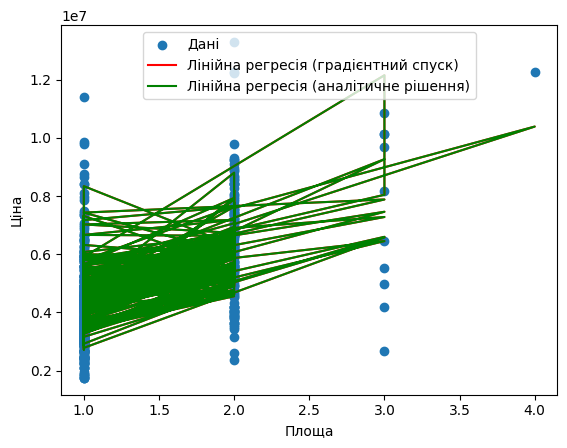

In [170]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], y, label='Дані')
plt.xlabel('Площа')
plt.ylabel('Ціна')

plt.plot(X[:, 1], hypothesis(gradient_descent_params, X_standardized), label='Лінійна регресія (градієнтний спуск)', color='red')

plt.plot(X[:, 1], hypothesis(gradient_descent_params, X_standardized), label='Лінійна регресія (аналітичне рішення)', color='green')

plt.legend()
plt.show()
